In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [81]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Mudando os nomes das variáveis e das classes

In [82]:
df.rename(columns={'id':'ID', 'gender': 'Gênero', 'age': 'Idade', 'hypertension':'Hipertensão', 'heart_disease':'Doença cardíaca',
                   'ever_married':'Já casou','work_type':'Tipo de trabalho','Residence_type':'Tipo de residência',
                   'avg_glucose_level':'Nível médio de glicose','bmi':'IMC','smoking_status':'Tabagismo','stroke':'Derrame'}, inplace=True)

In [83]:
df.head()

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df["Gênero"] = df["Gênero"].str.replace("Male","Masculino")
df["Gênero"] = df["Gênero"].str.replace("Female","Feminino")
df["Gênero"] = df["Gênero"].str.replace("Other","Outro")

In [85]:
df["Já casou"] = df["Já casou"].str.replace("Yes","Sim")
df["Já casou"] = df["Já casou"].str.replace("No","Não")

In [86]:
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("children","Criança")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Govt_job","Serv_publi")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Never_worked","Nunca_trab")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Private","Privado")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Self-employed","Autônomo")

In [87]:
df["Tipo de residência"] = df["Tipo de residência"].str.replace("Urban","Urbana")

In [88]:
df["Tabagismo"] = df["Tabagismo"].str.replace("formerly smoked","Já fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("never smoked","Nunca fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("smokes","Fuma")
df["Tabagismo"] = df["Tabagismo"].str.replace("Unknown","Desconhecido")

In [89]:
df.head(6)

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou,1
1,51676,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,Nunca fumou,1
2,31112,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou,1
3,60182,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma,1
4,1665,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou,1
5,56669,Masculino,81.0,0,0,Sim,Privado,Urbana,186.21,29.0,Já fumou,1


### Para colocar no artigo

In [90]:
print(df.head(6).to_latex())

\begin{tabular}{lrlrrrlllrrlr}
\toprule
{} &     ID &     Gênero &  Idade &  Hipertensão &  Doença cardíaca & Já casou & Tipo de trabalho & Tipo de residência &  Nível médio de glicose &   IMC &    Tabagismo &  Derrame \\
\midrule
0 &   9046 &  Masculino &   67.0 &            0 &                1 &      Sim &          Privado &             Urbana &                  228.69 &  36.6 &     Já fumou &        1 \\
1 &  51676 &   Feminino &   61.0 &            0 &                0 &      Sim &         Autônomo &              Rural &                  202.21 &   NaN &  Nunca fumou &        1 \\
2 &  31112 &  Masculino &   80.0 &            0 &                1 &      Sim &          Privado &              Rural &                  105.92 &  32.5 &  Nunca fumou &        1 \\
3 &  60182 &   Feminino &   49.0 &            0 &                0 &      Sim &          Privado &             Urbana &                  171.23 &  34.4 &         Fuma &        1 \\
4 &   1665 &   Feminino &   79.0 &           

C:\Users\botel\AppData\Local\Temp\ipykernel_11636\2681387947.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.head(6).to_latex())


#### Porcentagem de pacientes com derrame

In [91]:
(df["Derrame"] == 1).sum()/((df["Derrame"] == 1).sum()+(df["Derrame"] == 0).sum())

0.0487279843444227

#### Dados nulos e derrame

In [92]:
df["IMC"][0:248].isnull().sum()

40

In [93]:
40/249

0.1606425702811245

## Dados Faltantes

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      5110 non-null   int64  
 1   Gênero                  5110 non-null   object 
 2   Idade                   5110 non-null   float64
 3   Hipertensão             5110 non-null   int64  
 4   Doença cardíaca         5110 non-null   int64  
 5   Já casou                5110 non-null   object 
 6   Tipo de trabalho        5110 non-null   object 
 7   Tipo de residência      5110 non-null   object 
 8   Nível médio de glicose  5110 non-null   float64
 9   IMC                     4909 non-null   float64
 10  Tabagismo               5110 non-null   object 
 11  Derrame                 5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [95]:
old_IMC = df["IMC"].copy()#Para comparação

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier #Usando uma arvore de decisão para prever os
                                                                      #dados faltantes

In [97]:
DT_IMC_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X1 = df[['Idade','Gênero','IMC','Nível médio de glicose']].copy()
X1['Gênero'] = X1['Gênero'].replace({'Masculino':0,'Feminino':1,'Outro':-1}).astype(np.uint8)

Missing = X1[X1['IMC'].isna()]
X1 = X1[~X1['IMC'].isna()]
Y1 = X1.pop('IMC')
DT_IMC_pipe.fit(X1,Y1)
#Usando vairáveis relacionadas com IMC para prevelo, 'Idade','Gênero','Nível médio de glicose'
predicted_IMC = pd.Series(DT_IMC_pipe.predict(Missing[['Idade','Gênero','Nível médio de glicose']]),index=Missing.index)
df.loc[Missing.index,'IMC'] = predicted_IMC

In [98]:
display(old_IMC)
display(df['IMC'])

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: IMC, Length: 5110, dtype: float64

0       36.6
1       45.0
2       32.5
3       34.4
4       24.0
        ... 
5105    28.7
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: IMC, Length: 5110, dtype: float64

In [99]:
df.describe() #Fora os dados faltantes em IMC, não parece que temos outliers

,ID,Idade,Hipertensão,Doença cardíaca,Nível médio de glicose,IMC,Derrame
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.945117,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.877537,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.600000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Análise das variáveis

In [100]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

### Plot da comparação das frequências das variáveis continuas

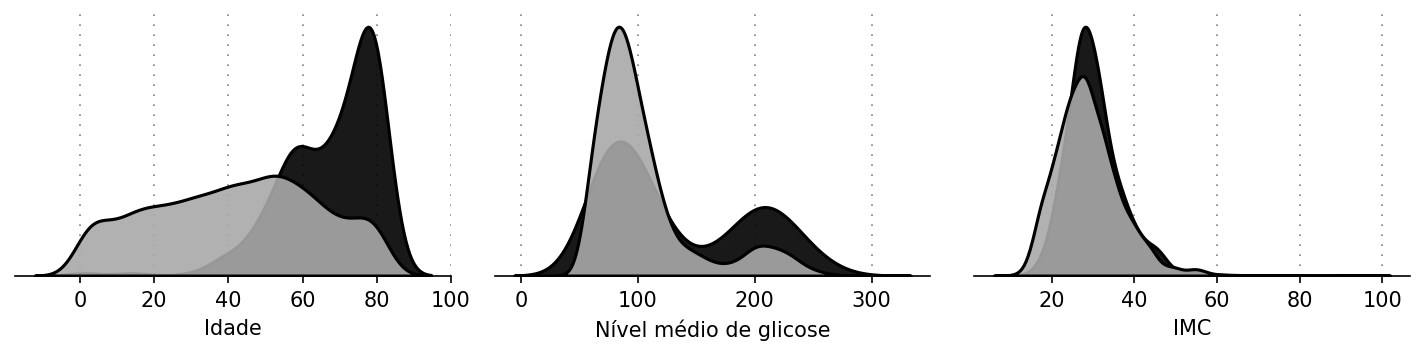

In [101]:
variables = [variable for variable in df.columns if variable not in ['ID','Derrame']]

conts = ['Idade','Nível médio de glicose','IMC']

background_color = "#ffffff"
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['Derrame'] == 1]
ns = df[df['Derrame'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#000000', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#a9a9a9', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Idade')
ax1.set_xlabel('Nível médio de glicose')
ax2.set_xlabel('IMC')

plt.show()

### Plot da comparação das frequências das variáveis categóricas

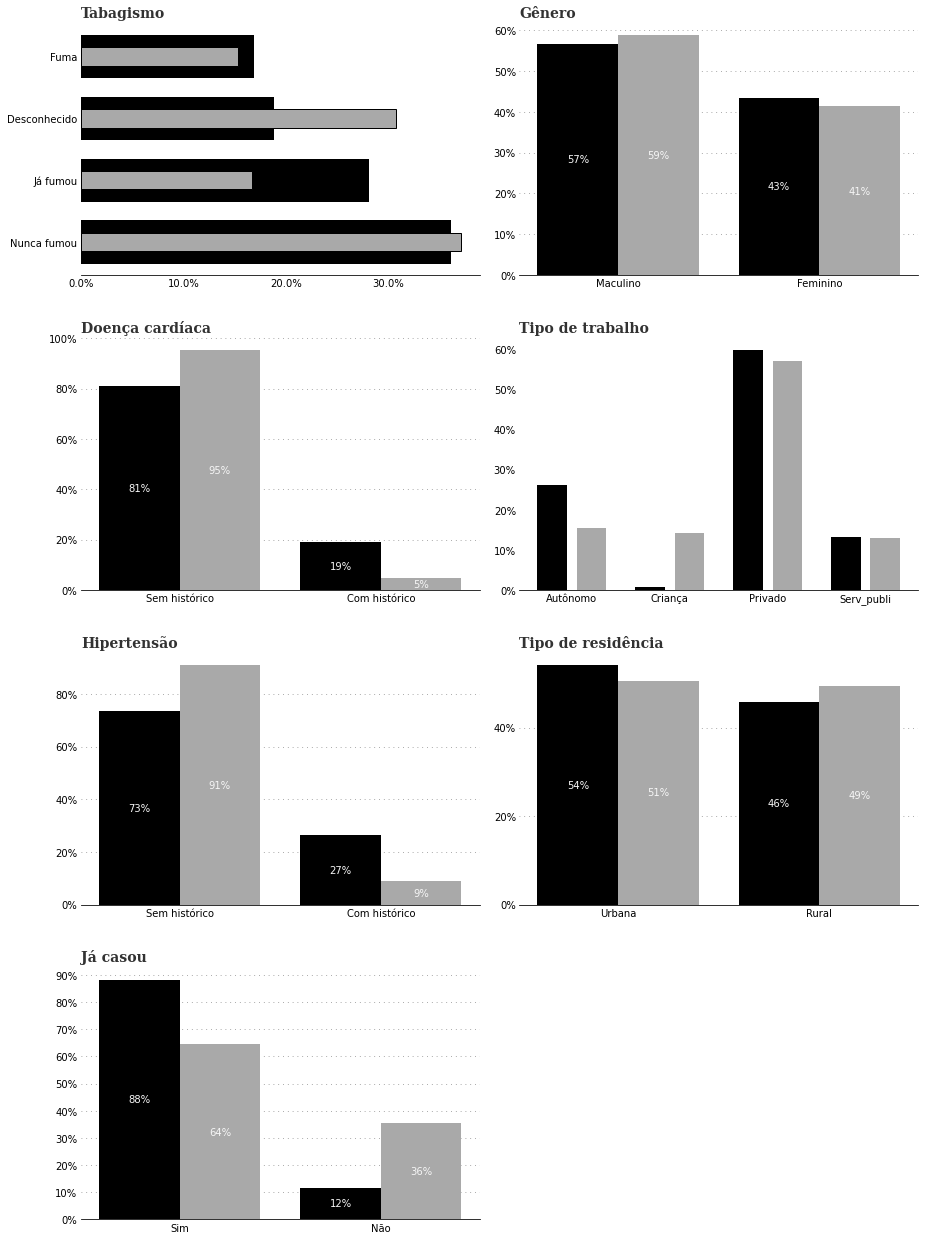

In [102]:
str_only = df[df['Derrame'] == 1]
no_str_only = df[df['Derrame'] == 0]
no_str_only = no_str_only[(no_str_only['Gênero'] != 'Outro')]

fig = plt.figure(figsize=(15,22))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)


# Plots

# Smoking
positive = pd.DataFrame(str_only["Tabagismo"].value_counts())
positive["Percentage"] = positive["Tabagismo"].apply(lambda x: x/sum(positive["Tabagismo"])*100)
negative = pd.DataFrame(no_str_only["Tabagismo"].value_counts())
negative["Percentage"] = negative["Tabagismo"].apply(lambda x: x/sum(negative["Tabagismo"])*100)

ax0.set_title('Tabagismo',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.barh(positive.index, positive['Percentage'], color="#000000", zorder=3, height=0.7)
ax0.barh(negative.index, negative['Percentage'], color="#a9a9a9", zorder=3,ec='black', height=0.3)
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
positive = pd.DataFrame(str_only["Gênero"].value_counts())
positive["Percentage"] = positive["Gênero"].apply(lambda x: x/sum(positive["Gênero"])*100)
negative = pd.DataFrame(no_str_only["Gênero"].value_counts())
negative["Percentage"] = negative["Gênero"].apply(lambda x: x/sum(negative["Gênero"])*100)

x = np.arange(len(positive))
ax1.set_title('Gênero',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax1.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['Maculino','Feminino'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    

# Heart Dis

positive = pd.DataFrame(str_only["Doença cardíaca"].value_counts())
positive["Percentage"] = positive["Doença cardíaca"].apply(lambda x: x/sum(positive["Doença cardíaca"])*100)
negative = pd.DataFrame(no_str_only["Doença cardíaca"].value_counts())
negative["Percentage"] = negative["Doença cardíaca"].apply(lambda x: x/sum(negative["Doença cardíaca"])*100)

x = np.arange(len(positive))
ax2.set_title('Doença cardíaca',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Sem histórico','Com histórico'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Work Type


positive = pd.DataFrame(str_only["Tipo de trabalho"].value_counts())
positive["Percentage"] = positive["Tipo de trabalho"].apply(lambda x: x/sum(positive["Tipo de trabalho"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["Tipo de trabalho"].value_counts())
negative["Percentage"] = negative["Tipo de trabalho"].apply(lambda x: x/sum(negative["Tipo de trabalho"])*100)
negative = negative.sort_index()
negative.drop('Nunca_trab',axis=0,inplace=True)

ax3.bar(np.arange(len(positive.index))-0.4, height=positive["Percentage"], zorder=3, color="#000000", width=0.3)
#ax3.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax3.bar(negative.index, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.3)
#ax3.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax3.set_xticks(np.arange(len(positive.index))-0.4 / 2)
ax3.set_xticklabels(list(positive.index),rotation=0)
ax3.set_title('Tipo de trabalho',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# hypertension

positive = pd.DataFrame(str_only["Hipertensão"].value_counts())
positive["Percentage"] = positive["Hipertensão"].apply(lambda x: x/sum(positive["Hipertensão"])*100)
negative = pd.DataFrame(no_str_only["Hipertensão"].value_counts())
negative["Percentage"] = negative["Hipertensão"].apply(lambda x: x/sum(negative["Hipertensão"])*100)

x = np.arange(len(positive))
ax4.set_title('Hipertensão',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax4.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax4.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax4.set_xticks(x + 0.4 / 2)
ax4.set_xticklabels(['Sem histórico','Com histórico'])
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
ax4.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax4.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax4.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
# residência

positive = pd.DataFrame(str_only["Tipo de residência"].value_counts())
positive["Percentage"] = positive["Tipo de residência"].apply(lambda x: x/sum(positive["Tipo de residência"])*100)
negative = pd.DataFrame(no_str_only["Tipo de residência"].value_counts())
negative["Percentage"] = negative["Tipo de residência"].apply(lambda x: x/sum(negative["Tipo de residência"])*100)

x = np.arange(len(positive))
ax5.set_title('Tipo de residência',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax5.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['Urbana','Rural'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

#Já casou
    
positive = pd.DataFrame(str_only["Já casou"].value_counts())
positive["Percentage"] = positive["Já casou"].apply(lambda x: x/sum(positive["Já casou"])*100)
negative = pd.DataFrame(no_str_only["Já casou"].value_counts())
negative["Percentage"] = negative["Já casou"].apply(lambda x: x/sum(negative["Já casou"])*100)

x = np.arange(len(positive))
ax6.set_title('Já casou',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax6.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax6.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax6.set_xticks(x + 0.4 / 2)
ax6.set_xticklabels(['Sim','Não'])
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
ax6.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax6.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax6.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
# tidy up


for s in ["top","right","left"]:
    for i in range(0,7):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,7):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

        
plt.show()

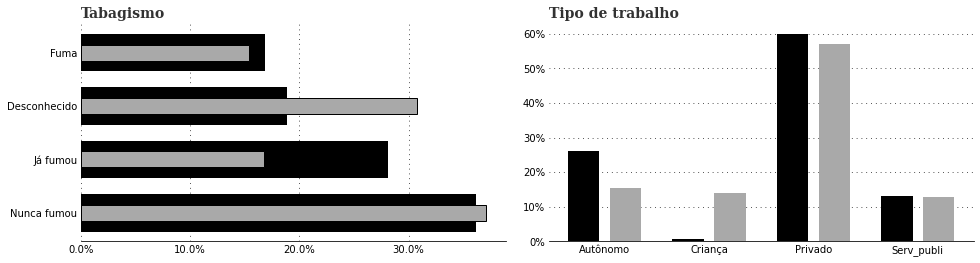

In [103]:
str_only = df[df['Derrame'] == 1]
no_str_only = df[df['Derrame'] == 0]
no_str_only = no_str_only[(no_str_only['Gênero'] != 'Outro')]

fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color

ax0.grid(axis='x', color='black', linestyle=':', dashes=(1,5))
ax1.grid(axis='y', color='black', linestyle=':', dashes=(1,5))

# Plots

# Smoking
positive = pd.DataFrame(str_only["Tabagismo"].value_counts())
positive["Percentage"] = positive["Tabagismo"].apply(lambda x: x/sum(positive["Tabagismo"])*100)
negative = pd.DataFrame(no_str_only["Tabagismo"].value_counts())
negative["Percentage"] = negative["Tabagismo"].apply(lambda x: x/sum(negative["Tabagismo"])*100)

ax0.set_title('Tabagismo',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.barh(positive.index, positive['Percentage'], color="#000000", zorder=3, height=0.7)
ax0.barh(negative.index, negative['Percentage'], color="#a9a9a9", zorder=3,ec='black', height=0.3)
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))



positive = pd.DataFrame(str_only["Tipo de trabalho"].value_counts())
positive["Percentage"] = positive["Tipo de trabalho"].apply(lambda x: x/sum(positive["Tipo de trabalho"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["Tipo de trabalho"].value_counts())
negative["Percentage"] = negative["Tipo de trabalho"].apply(lambda x: x/sum(negative["Tipo de trabalho"])*100)
negative = negative.sort_index()
negative.drop('Nunca_trab',axis=0,inplace=True)

ax1.bar(np.arange(len(positive.index))-0.4, height=positive["Percentage"], zorder=3, color="#000000", width=0.3)
ax1.bar(negative.index, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.3)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax1.set_xticks(np.arange(len(positive.index))-0.4 / 2)
ax1.set_xticklabels(list(positive.index),rotation=0)
ax1.set_title('Tipo de trabalho',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



for s in ["top","right","left"]:
    for i in range(0,2):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,2):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 
        
plt.show()

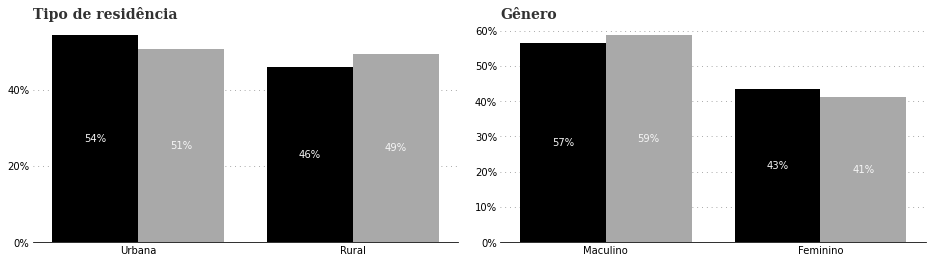

In [104]:
str_only = df[df['Derrame'] == 1]
no_str_only = df[df['Derrame'] == 0]
no_str_only = no_str_only[(no_str_only['Gênero'] != 'Outro')]

fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color

ax0.grid(axis='y', color='black', linestyle=':', dashes=(1,5))
ax1.grid(axis='y', color='black', linestyle=':', dashes=(1,5))

positive = pd.DataFrame(str_only["Tipo de residência"].value_counts())
positive["Percentage"] = positive["Tipo de residência"].apply(lambda x: x/sum(positive["Tipo de residência"])*100)
negative = pd.DataFrame(no_str_only["Tipo de residência"].value_counts())
negative["Percentage"] = negative["Tipo de residência"].apply(lambda x: x/sum(negative["Tipo de residência"])*100)

x = np.arange(len(positive))
ax0.set_title('Tipo de residência',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax0.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['Urbana','Rural'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

positive = pd.DataFrame(str_only["Gênero"].value_counts())
positive["Percentage"] = positive["Gênero"].apply(lambda x: x/sum(positive["Gênero"])*100)
negative = pd.DataFrame(no_str_only["Gênero"].value_counts())
negative["Percentage"] = negative["Gênero"].apply(lambda x: x/sum(negative["Gênero"])*100)

x = np.arange(len(positive))
ax1.set_title('Gênero',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax1.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['Maculino','Feminino'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

for s in ["top","right","left"]:
    for i in range(0,2):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,2):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 
        
plt.show()

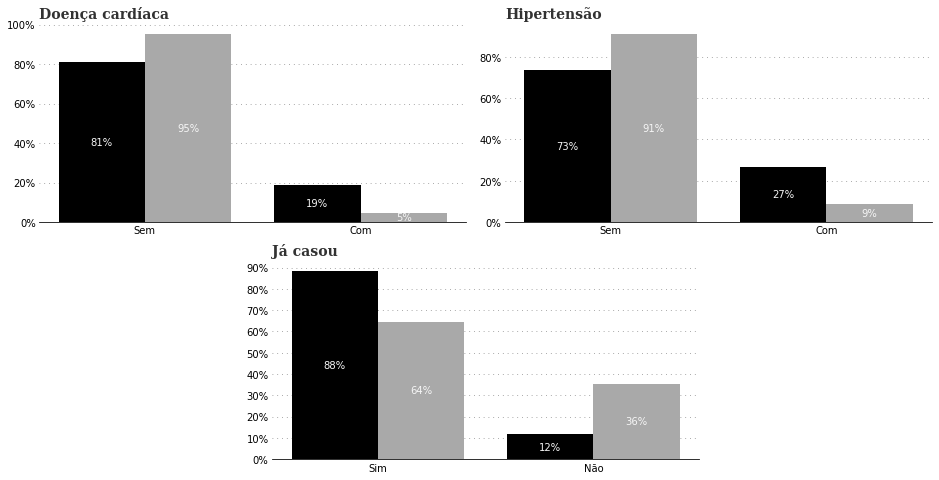

In [105]:
str_only = df[df['Derrame'] == 1]
no_str_only = df[df['Derrame'] == 0]
no_str_only = no_str_only[(no_str_only['Gênero'] != 'Outro')]

fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.1, hspace=0.25)
ax0 = plt.subplot2grid((2,4),(0,0), colspan=2)
ax1 = plt.subplot2grid((2,4),(0,2), colspan=2)
ax2 = plt.subplot2grid((2,4),(1,1), colspan=2)

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color

ax0.grid(axis='y', color='black', linestyle=':', dashes=(1,5))
ax1.grid(axis='y', color='black', linestyle=':', dashes=(1,5))
ax2.grid(axis='y', color='black', linestyle=':', dashes=(1,5))

# Heart Dis

positive = pd.DataFrame(str_only["Doença cardíaca"].value_counts())
positive["Percentage"] = positive["Doença cardíaca"].apply(lambda x: x/sum(positive["Doença cardíaca"])*100)
negative = pd.DataFrame(no_str_only["Doença cardíaca"].value_counts())
negative["Percentage"] = negative["Doença cardíaca"].apply(lambda x: x/sum(negative["Doença cardíaca"])*100)

x = np.arange(len(positive))
ax0.set_title('Doença cardíaca',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax0.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['Sem','Com'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# hypertension

positive = pd.DataFrame(str_only["Hipertensão"].value_counts())
positive["Percentage"] = positive["Hipertensão"].apply(lambda x: x/sum(positive["Hipertensão"])*100)
negative = pd.DataFrame(no_str_only["Hipertensão"].value_counts())
negative["Percentage"] = negative["Hipertensão"].apply(lambda x: x/sum(negative["Hipertensão"])*100)

x = np.arange(len(positive))
ax1.set_title('Hipertensão',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax1.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['Sem','Com'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

#Já casou
    
positive = pd.DataFrame(str_only["Já casou"].value_counts())
positive["Percentage"] = positive["Já casou"].apply(lambda x: x/sum(positive["Já casou"])*100)
negative = pd.DataFrame(no_str_only["Já casou"].value_counts())
negative["Percentage"] = negative["Já casou"].apply(lambda x: x/sum(negative["Já casou"])*100)

x = np.arange(len(positive))
ax2.set_title('Já casou',loc='left', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#000000", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#a9a9a9", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Sim','Não'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    
# tidy up


for s in ["top","right","left"]:
    for i in range(0,3):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,3):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

        
plt.show()

### Plot da comparação entre os casos com derrame e sem derrame

C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\si

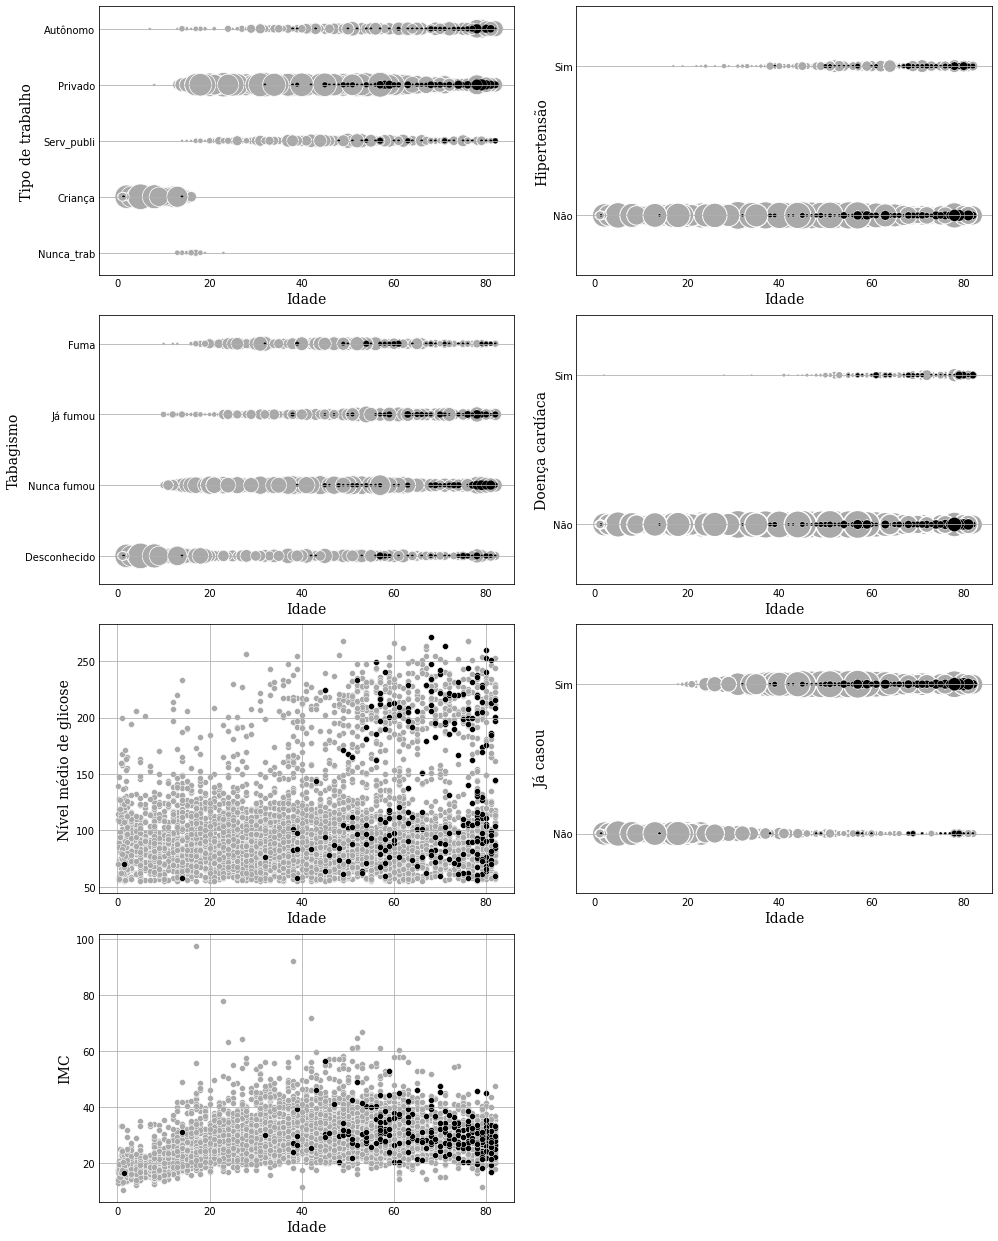

In [106]:
from collections import Counter

fig = plt.figure(figsize=(16,22))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.15, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])

ax0.grid(axis='y')
ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')
ax4.grid()
ax5.grid(axis='y')
ax6.grid()

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

nso = no_str_only['Idade']
so = str_only['Idade']

# Tipo de trabalho

x1 = no_str_only['Tipo de trabalho'].copy()
x2 = str_only['Tipo de trabalho'].copy()
x1.replace(['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'],
                        [0,1,2,3,4], inplace=True)
x2.replace(['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'],
                        [0,1,2,3,4], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax0)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax0)

ax0.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax0.set_ylabel("Tipo de trabalho",fontsize=14,fontfamily='serif')
ax0.set_ylim([-0.4,4.4])
ax0.set_yticks([0,1,2,3,4], labels=['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'], minor=False)


# Já casou

x1 = no_str_only['Já casou'].copy()
x2 = str_only['Já casou'].copy()
x1.replace(['Não','Sim'],
                        [0,1], inplace=True)
x2.replace(['Não','Sim'],
                        [0,1], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax5)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax5)

ax5.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax5.set_ylabel("Já casou",fontsize=14,fontfamily='serif')
ax5.set_ylim([-0.4,1.4])
ax5.set_yticks([0,1], labels=['Não','Sim'], minor=False)

# hipertensão

x1 = no_str_only['Hipertensão'].copy()
x2 = str_only['Hipertensão'].copy()

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax1)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax1)

ax1.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax1.set_ylabel("Hipertensão",fontsize=14,fontfamily='serif')
ax1.set_ylim([-0.4,1.4])
ax1.set_yticks([0,1], labels=['Não','Sim'], minor=False)

# Doença cardiaca

x1 = no_str_only['Doença cardíaca'].copy()
x2 = str_only['Doença cardíaca'].copy()

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax3)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax3)

ax3.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax3.set_ylabel("Doença cardíaca",fontsize=14,fontfamily='serif')
ax3.set_ylim([-0.4,1.4])
ax3.set_yticks([0,1], labels=['Não','Sim'], minor=False)

#Tabagismo

x1 = no_str_only['Tabagismo'].copy()
x2 = str_only['Tabagismo'].copy()
x1.replace(['Desconhecido','Nunca fumou','Já fumou','Fuma'],
                        [0,1,2,3], inplace=True)
x2.replace(['Desconhecido','Nunca fumou','Já fumou','Fuma'],
                        [0,1,2,3], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax2)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax2)

ax2.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax2.set_ylabel("Tabagismo",fontsize=14,fontfamily='serif')
ax2.set_ylim([-0.4,3.4])
ax2.set_yticks([0,1,2,3], labels=['Desconhecido','Nunca fumou','Já fumou','Fuma'], minor=False)

#Nível médio de glicose

x1 = no_str_only['Nível médio de glicose'].copy()
x2 = str_only['Nível médio de glicose'].copy()

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',
            ax=ax4)

sns.scatterplot(so,y=x2,  
            color='#000000',
            ax=ax4)

ax4.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax4.set_ylabel("Nível médio de glicose",fontsize=14,fontfamily='serif')

#IMC

x1 = no_str_only['IMC'].copy()
x2 = str_only['IMC'].copy()

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',
            ax=ax6)

sns.scatterplot(so,y=x2,  
            color='#000000',
            ax=ax6)

ax6.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax6.set_ylabel("IMC",fontsize=14,fontfamily='serif')
        
for i in range(0,7):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)

plt.show()

C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\si

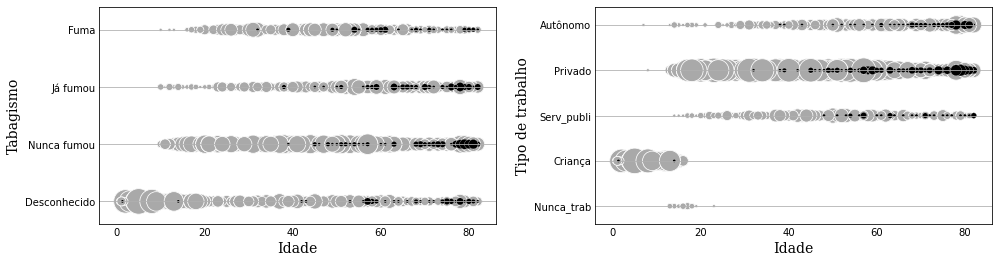

In [107]:
fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.grid(axis='y')
ax1.grid(axis='y')

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

nso = no_str_only['Idade']
so = str_only['Idade']

# Tipo de trabalho

x1 = no_str_only['Tipo de trabalho'].copy()
x2 = str_only['Tipo de trabalho'].copy()
x1.replace(['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'],
                        [0,1,2,3,4], inplace=True)
x2.replace(['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'],
                        [0,1,2,3,4], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax1)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax1)

ax1.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax1.set_ylabel("Tipo de trabalho",fontsize=14,fontfamily='serif')
ax1.set_ylim([-0.4,4.4])
ax1.set_yticks([0,1,2,3,4], labels=['Nunca_trab','Criança','Serv_publi','Privado','Autônomo'], minor=False)



#Tabagismo

x1 = no_str_only['Tabagismo'].copy()
x2 = str_only['Tabagismo'].copy()
x1.replace(['Desconhecido','Nunca fumou','Já fumou','Fuma'],
                        [0,1,2,3], inplace=True)
x2.replace(['Desconhecido','Nunca fumou','Já fumou','Fuma'],
                        [0,1,2,3], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax0)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax0)

ax0.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax0.set_ylabel("Tabagismo",fontsize=14,fontfamily='serif')
ax0.set_ylim([-0.4,3.4])
ax0.set_yticks([0,1,2,3], labels=['Desconhecido','Nunca fumou','Já fumou','Fuma'], minor=False)
        
for i in range(0,2):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)

plt.show()

C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\si

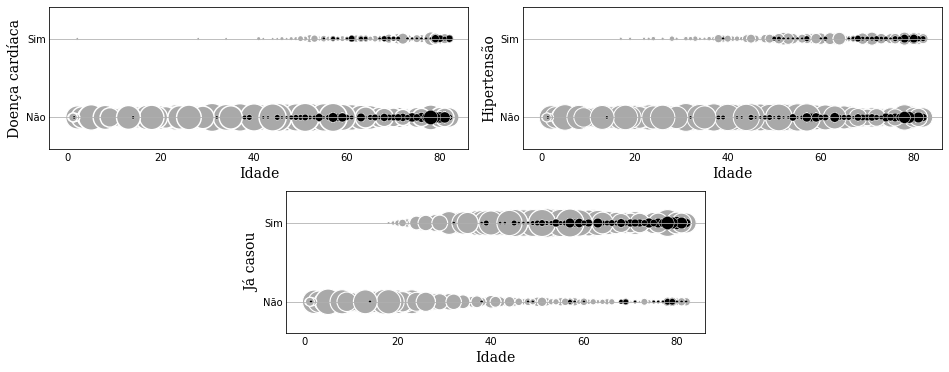

In [108]:
fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
ax0 = plt.subplot2grid((2,4),(0,0), colspan=2)
ax1 = plt.subplot2grid((2,4),(0,2), colspan=2)
ax2 = plt.subplot2grid((2,4),(1,1), colspan=2)
plt.subplots_adjust(wspace=0.3,hspace=0.3)

ax0.grid(axis='y')
ax1.grid(axis='y')
ax2.grid(axis='y')

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

nso = no_str_only['Idade']
so = str_only['Idade']

# Já casou

x1 = no_str_only['Já casou'].copy()
x2 = str_only['Já casou'].copy()
x1.replace(['Não','Sim'],
                        [0,1], inplace=True)
x2.replace(['Não','Sim'],
                        [0,1], inplace=True)

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax2)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax2)

ax2.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax2.set_ylabel("Já casou",fontsize=14,fontfamily='serif')
ax2.set_ylim([-0.4,1.4])
ax2.set_yticks([0,1], labels=['Não','Sim'], minor=False)

# hipertensão

x1 = no_str_only['Hipertensão'].copy()
x2 = str_only['Hipertensão'].copy()

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax1)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax1)

ax1.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax1.set_ylabel("Hipertensão",fontsize=14,fontfamily='serif')
ax1.set_ylim([-0.4,1.4])
ax1.set_yticks([0,1], labels=['Não','Sim'], minor=False)

# Doença cardiaca

x1 = no_str_only['Doença cardíaca'].copy()
x2 = str_only['Doença cardíaca'].copy()

c1 = Counter(zip(nso,x1))
c2 = Counter(zip(so,x2))

s1 = [10*c1[(xx,yy)] for xx,yy in zip(nso,x1)]
s2 = [10*c2[(xx,yy)] for xx,yy in zip(so,x2)]

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',s=s1,
            ax=ax0)

sns.scatterplot(so,y=x2,  
            color='#000000',s=s2,
            ax=ax0)

ax0.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax0.set_ylabel("Doença cardíaca",fontsize=14,fontfamily='serif')
ax0.set_ylim([-0.4,1.4])
ax0.set_yticks([0,1], labels=['Não','Sim'], minor=False)
        
for i in range(0,3):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)

plt.show()

C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\botel\anaconda3\lib\si

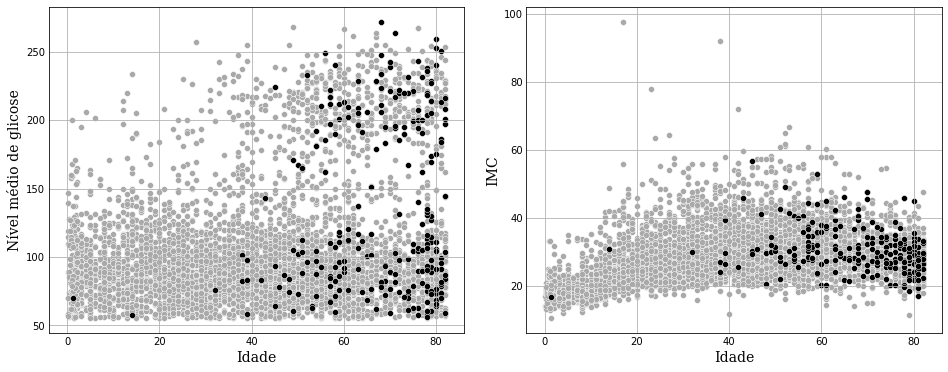

In [109]:
fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.15, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.grid()
ax1.grid()

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

nso = no_str_only['Idade']
so = str_only['Idade']

#Nível médio de glicose

x1 = no_str_only['Nível médio de glicose'].copy()
x2 = str_only['Nível médio de glicose'].copy()

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',
            ax=ax0)

sns.scatterplot(so,y=x2,  
            color='#000000',
            ax=ax0)

ax0.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax0.set_ylabel("Nível médio de glicose",fontsize=14,fontfamily='serif')

#IMC

x1 = no_str_only['IMC'].copy()
x2 = str_only['IMC'].copy()

sns.scatterplot(nso,y=x1,  
            color='#a9a9a9',
            ax=ax1)

sns.scatterplot(so,y=x2,  
            color='#000000',
            ax=ax1)

ax1.set_xlabel("Idade",fontsize=14,fontfamily='serif')
ax1.set_ylabel("IMC",fontsize=14,fontfamily='serif')
        
for i in range(0,2):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)

plt.show()